In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [3]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### Y:연속형 : 단일 변수에 대한 정규성 여부 판단
- 검증 갯수 따른 방법 선택 
    - 5천개 이하 : shapiro normality test
    - 5천개 이상 : Anderson normality test

#### 선정 변수 : age
- 분석 내용 : 나이가 정규 분포를 따르는가 ?
    - 귀무가설 : 나이가 정규 분포이다.
    - 대립가설 : 나이가 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 81.5 > 0.78(p-value 0.05)므로 대립가설이 참.
    - 사실 결론 : 나이가 정규 분포가 아니다.

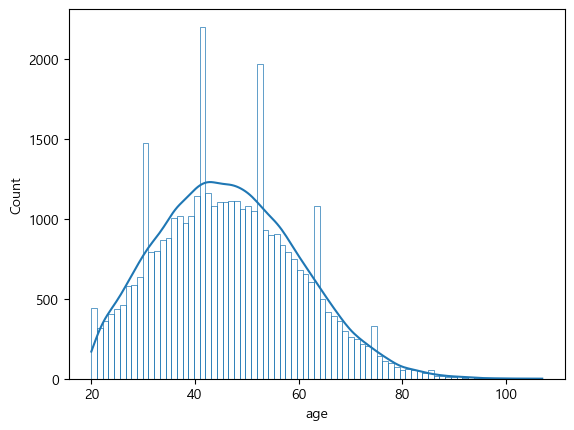

In [39]:
sns.histplot(data=df_TOCC, x='age', kde=True, fill=False)
plt.show()

In [40]:
df_age = df_TOCC['age'].dropna()

In [50]:
## s < cv : 정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_age)
s, cv, sl # 81.55 > 0.78 : 비정규 분포

(81.5597210112901,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정 변수 : Mileage[:200]
- 분석 내용 : 마일리지가 정규 분포를 따르는가 ?
    - 귀무가설 : 마일리지가 정규 분포이다.
    - 대립가설 : 마일리지가 정규 분포가 아니다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue=0.029로써 대립가설이 참.
    - 사실 결론 : 마일리지가 정규 분포가 아니다.

In [53]:
df_TOCC_dropna = df_TOCC.dropna()[:500]
df_TOCC_dropna[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

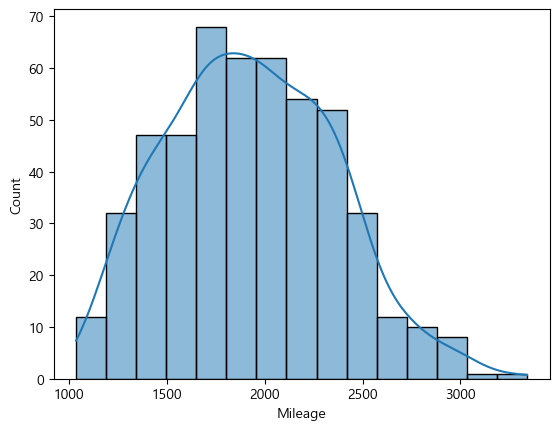

In [54]:
sns.histplot(data=df_TOCC_dropna, x='Mileage', kde=True)

In [55]:
stats.shapiro(df_TOCC_dropna['Mileage'])

ShapiroResult(statistic=0.987966001033783, pvalue=0.000388040003599599)

#### 선정 변수 : age, Mileage
- 분석 내용 : 나이에 따라서 마일리지 변화가 있을는가 ?
    - 귀무가설 : 나이에 따라서 마일리지 변화가 없다.
    - 대립가설 : 나이에 따라서 마일리지 변화가 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 대립가설 참.
    - 사실 결론 : 나이에 따라서 마일리지 올라간다.(0.97, pvalue=0.0)

In [3]:
df_TOCC[['type_of_contract', 'cancellation']].describe()

,type_of_contract,cancellation
count,51300,51279
unique,2,2
top,렌탈,정상
freq,46481,50372


In [4]:
df_TOCC_category = df_TOCC[['type_of_contract', 'cancellation']]

In [5]:
df_TOCC_category_pivot = pd.pivot_table(data=df_TOCC_category
               , index='type_of_contract', columns='cancellation'
               , aggfunc=len)
df_TOCC_category_pivot

cancellation,정상,해약
type_of_contract,,
렌탈,46137,344
멤버십,4231,563


In [6]:
import scipy
scipy.__version__
import scipy.stats as stats

In [7]:
stats.chi2_contingency(observed=df_TOCC_category_pivot, correction=True)

(3021.9735309482894,
 0.0,
 1,
 array([[45658.8007411,   822.1992589],
        [ 4709.1992589,    84.8007411]]))

In [29]:
# 다른 변수 이름 작성 시 copy() 사용
df_TOCC_product = df_TOCC[['product', 'cancellation']].dropna().copy()
# df_TOCC_product[:2]
df_TOCC_product.describe()

,product,cancellation
count,51278,51278
unique,6,2
top,K1,정상
freq,39111,50371


In [41]:
df_TOCC_product_pivot = pd.pivot_table(data=df_TOCC_product
              , index='cancellation', columns='product'
              , aggfunc=len)
df_TOCC_product_pivot

product,K1,K2,K3,K4,K5,K6
cancellation,,,,,,
정상,38291,8926,2072,323,641,118
해약,820,67,10,4,4,2


In [33]:
## product 기준
stats.chi2_contingency(observed=df_TOCC_product_pivot
                      , correction=True)

(103.79474317337241,
 8.372028115481391e-21,
 5,
 array([[3.84192086e+04, 6.91791353e+02],
        [8.83393274e+03, 1.59067261e+02],
        [2.04517380e+03, 3.68262023e+01],
        [3.21216058e+02, 5.78394243e+00],
        [6.33591306e+02, 1.14086938e+01],
        [1.17877452e+02, 2.12254768e+00]]))

In [42]:
## cancellation 기준 
stats.chi2_contingency(observed=df_TOCC_product_pivot
                      , correction=True)

(103.79474317337241,
 8.372028115481391e-21,
 5,
 array([[3.84192086e+04, 8.83393274e+03, 2.04517380e+03, 3.21216058e+02,
         6.33591306e+02, 1.17877452e+02],
        [6.91791353e+02, 1.59067261e+02, 3.68262023e+01, 5.78394243e+00,
         1.14086938e+01, 2.12254768e+00]]))